In [11]:
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from script import *
from transforms_list import *

In [12]:
##########################
### SETTINGS
##########################

RANDOM_SEED = 123
BATCH_SIZE = 32
NUM_EPOCHS = 20
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [13]:
# class CustomDataset(Dataset):
# dm = MNISTDataModule(batch_size=BATCH_SIZE, augment=AllTransforms.RANDOMROTATION, do_more_transforms=True, more_transforms=AllTransforms.RANDOMROTATION)
dm = MyDataModule(batch_size=BATCH_SIZE, augment=AllTransforms.RANDOMROTATION)
dm.setup(stage='do_augment')
# print(len(dm.train_dataset))
train = dm.train_dataloader()
test = dm.test_dataloader()
val = dm.val_dataloader()

len train:  479
len val:  119
len test:  75


In [14]:
Alexnet_model = torchvision.models.alexnet(weights=None)
Alexnet_model.classifier[4] = nn.Linear(4096,1024)

Alexnet_model.classifier[6] = nn.Linear(1024,3)

In [15]:


Alexnet_model = Alexnet_model.to(DEVICE)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(Alexnet_model.parameters(), lr=0.0001)
# Lists to store loss and accuracy values
loss_values = []
accuracy_values = []
val_losses = []
# Training loop
# num_epochs = 20
for epoch in range(NUM_EPOCHS):  # Example: train for 10 epochs
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    Alexnet_model.train()
    for inputs, labels in train:
        inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)

        optimizer.zero_grad()
        outputs = Alexnet_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        _, predicted = torch.max(outputs, 1)  # Assuming 2 classes, which may not be true
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    epoch_loss = running_loss / len(train.dataset)
    epoch_accuracy = 100 * (correct_predictions / total_samples)

    loss_values.append(epoch_loss)
    accuracy_values.append(epoch_accuracy)
#     print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')
    
    
        # Validation phase
    Alexnet_model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val:
            # Move inputs and labels to the device
            inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)
         
            outputs = Alexnet_model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train loss: {epoch_loss}, Validation loss: {val_loss}")
    print('--------------------------')

    print()
    print()



print('Finished Training')

Epoch [1/20], Loss: 1.0672, Accuracy: 40.71%
Epoch 1/20 - Train loss: 1.0672104353695673, Validation loss: 1.0192559015851061
--------------------------


Epoch [2/20], Loss: 1.0082, Accuracy: 48.02%
Epoch 2/20 - Train loss: 1.0081737862748243, Validation loss: 0.9886923587622762
--------------------------


Epoch [3/20], Loss: 0.9633, Accuracy: 50.31%
Epoch 3/20 - Train loss: 0.9632789855959022, Validation loss: 0.9378416468115414
--------------------------


Epoch [4/20], Loss: 0.9226, Accuracy: 55.53%
Epoch 4/20 - Train loss: 0.9225967247700144, Validation loss: 0.9325999732778854
--------------------------


Epoch [5/20], Loss: 0.8632, Accuracy: 56.16%
Epoch 5/20 - Train loss: 0.8632413334289025, Validation loss: 0.8971634672469452
--------------------------


Epoch [6/20], Loss: 0.9097, Accuracy: 52.61%
Epoch 6/20 - Train loss: 0.909695470880616, Validation loss: 0.9696915660585675
--------------------------


Epoch [7/20], Loss: 0.8675, Accuracy: 56.99%
Epoch 7/20 - Train loss: 0

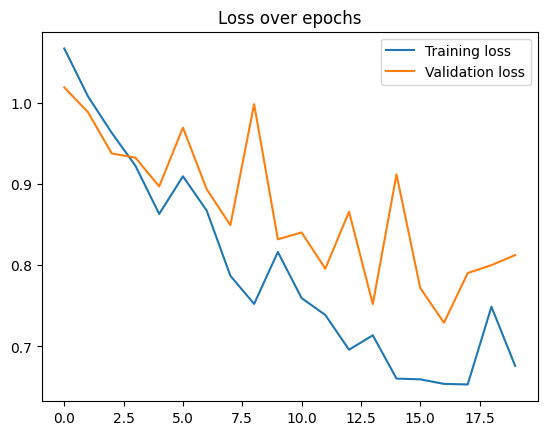

In [16]:
plt.plot(loss_values, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [18]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for inputs, labels in train:
        inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)
        # calculate outputs by running images through the network
        outputs = Alexnet_model(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 68 %


In [19]:
resnet50_model = torchvision.models.resnet50(weights=None)
# resnet50 = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_resnet50', pretrained=False)

# resnet50_model


In [20]:
resnet50_model.fc = nn.Linear(2048,3)
# resnet50_model

In [21]:


resnet50_model = resnet50_model.to(DEVICE)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet50_model.parameters(), lr=0.0001)
# Lists to store loss and accuracy values
loss_values = []
accuracy_values = []
val_losses = []
# Training loop
# num_epochs = 20
for epoch in range(NUM_EPOCHS):  # Example: train for 10 epochs
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    resnet50_model.train()
    for inputs, labels in train:
        inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)

        optimizer.zero_grad()
        outputs = resnet50_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        _, predicted = torch.max(outputs, 1)  # Assuming 2 classes, which may not be true
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)


    epoch_loss = running_loss / len(train.dataset)
    epoch_accuracy = 100 * (correct_predictions / total_samples)

    loss_values.append(epoch_loss)
    accuracy_values.append(epoch_accuracy)
#     print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')
    
    
        # Validation phase
    resnet50_model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val:
            # Move inputs and labels to the device
            inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)
         
            outputs = resnet50_model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train loss: {epoch_loss}, Validation loss: {val_loss}")
    print('--------------------------')

    print()
    print()



print('Finished Training')

input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  31
label  31
Epoch [1/20], Loss: 1.1030, Accuracy: 42.38%
Epoch 1/20 - Train loss: 1.1030475840688, Validation loss: 1.807242834267496
--------------------------


input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  31
label  31
Epoch [2/20], Loss: 1.0112, Accuracy: 51.77%
Epoch 2/20 - Train loss: 1.0111819831712758, Validation loss: 2.7563162931875023
--------------------------


input  32
label  32
input  32
label  32
input  32
label  32
input  32
label  32
input  32
labe

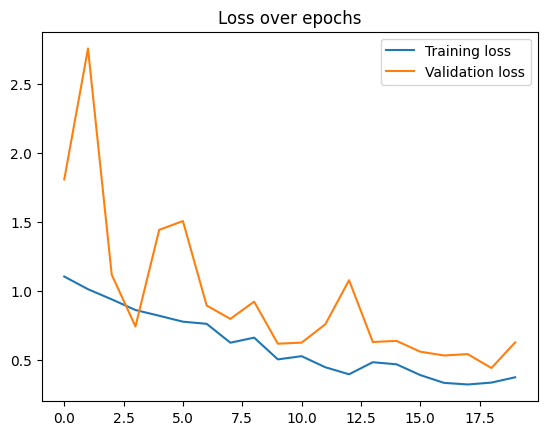

In [22]:
plt.plot(loss_values, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [23]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for inputs, labels in train:
        inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)
        # calculate outputs by running images through the network
        outputs = resnet50_model(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 88 %


In [30]:
densenet121_model = torchvision.models.densenet121(weights=None)


In [31]:
densenet121_model.classifier = nn.Linear(1024, 3)


In [32]:


densenet121_model = densenet121_model.to(DEVICE)


# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(densenet121_model.parameters(), lr=0.0001)
# Lists to store loss and accuracy values
loss_values = []
accuracy_values = []
val_losses = []
# Training loop
# num_epochs = 20
for epoch in range(NUM_EPOCHS):  # Example: train for 10 epochs
    running_loss = 0.0
    correct_predictions = 0
    total_samples = 0
    densenet121_model.train()
    for inputs, labels in train:
        inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)

        optimizer.zero_grad()
        outputs = densenet121_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        
        _, predicted = torch.max(outputs, 1)  # Assuming 2 classes, which may not be true
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)


    epoch_loss = running_loss / len(train.dataset)
    epoch_accuracy = 100 * (correct_predictions / total_samples)

    loss_values.append(epoch_loss)
    accuracy_values.append(epoch_accuracy)
#     print(f"Epoch {epoch+1}, Loss: {epoch_loss}")
    print(f'Epoch [{epoch+1}/{NUM_EPOCHS}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%')
    
    
        # Validation phase
    densenet121_model.eval()
    running_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val:
            # Move inputs and labels to the device
            inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)
         
            outputs = densenet121_model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item() * labels.size(0)
    val_loss = running_loss / len(val.dataset)
    val_losses.append(val_loss)
    print(f"Epoch {epoch+1}/{NUM_EPOCHS} - Train loss: {epoch_loss}, Validation loss: {val_loss}")
    print('--------------------------')

    print()
    print()



print('Finished Training')

Epoch [1/20], Loss: 0.8596, Accuracy: 58.66%
Epoch 1/20 - Train loss: 0.8595758625510341, Validation loss: 0.8310426203142695
--------------------------


Epoch [2/20], Loss: 0.5563, Accuracy: 75.99%
Epoch 2/20 - Train loss: 0.5562972789766395, Validation loss: 0.522703302507641
--------------------------


Epoch [3/20], Loss: 0.4480, Accuracy: 81.00%
Epoch 3/20 - Train loss: 0.447987991919846, Validation loss: 0.402113569884741
--------------------------


Epoch [4/20], Loss: 0.3869, Accuracy: 85.39%
Epoch 4/20 - Train loss: 0.38691771646382167, Validation loss: 0.48834093528635364
--------------------------


Epoch [5/20], Loss: 0.3618, Accuracy: 86.43%
Epoch 5/20 - Train loss: 0.3617650253663232, Validation loss: 0.36180008559667765
--------------------------


Epoch [6/20], Loss: 0.3378, Accuracy: 87.68%
Epoch 6/20 - Train loss: 0.337812821526617, Validation loss: 0.3573469041275377
--------------------------


Epoch [7/20], Loss: 0.2949, Accuracy: 88.10%
Epoch 7/20 - Train loss: 0

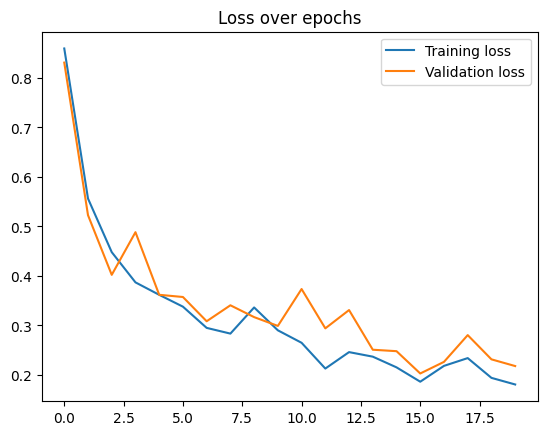

In [33]:
plt.plot(loss_values, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.title("Loss over epochs")
plt.show()

In [34]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for inputs, labels in train:
        inputs, labels = inputs.to(DEVICE), (labels - 1).to(DEVICE)
        # calculate outputs by running images through the network
        outputs = densenet121_model(inputs)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the test images: {100 * correct // total} %')

Accuracy of the network on the test images: 98 %
